In [1]:
import pickle
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('../../../src')
import raybay

In [2]:
# Load treatment plan results
result = np.load('result', allow_pickle=True)

In [3]:
# Reload goal and function dataframes (doesn't save correctly from remote)
result.goal_df = pd.read_csv('../goals.csv') 
result.func_df = pd.read_csv('funcs.csv')
pickle.dump(result, open('result', 'wb'))

In [4]:
# Clinical goals
result.goal_df

,Roi,Type,GoalCriteria,AcceptanceLevel,ParameterValue
0,Bronchus,MaxDvh,AtMost,1560,18.52
1,Bronchus,MaxDose,AtMost,3480,NaN
2,Chestwall_L,MaxDvh,AtMost,3000,2.04
3,D2cm,MaxDose,AtMost,2400,NaN
4,Esophagus,MaxDvh,AtMost,1880,16.91
5,Esophagus,MaxDose,AtMost,3000,NaN
6,GreatVes,MaxDvh,AtMost,4300,5.66
7,GreatVes,MaxDose,AtMost,4900,NaN
8,Heart,MaxDvh,AtMost,2800,1.84
9,Heart,MaxDose,AtMost,3400,NaN


In [5]:
# Constituent functions
result.func_df

,Roi,FunctionType,DoseLevel,PercentVolume,EudParameterA,Weight
0,Bronchus,MaxDvh,"[780,1560]",18.52,NaN,"[1,1000]"
1,Bronchus,MaxDose,"[1740,3480]",0.00,NaN,"[1,1000]"
2,Chestwall_L,MaxDvh,"[1500,3000]",2.04,NaN,"[1,1000]"
3,D2cm,MaxDose,"[1200,2400]",0.00,NaN,"[1,1000]"
4,Esophagus,MaxDvh,1880,16.91,NaN,1
5,Esophagus,MaxDose,3000,0.00,NaN,1
6,GreatVes,MaxDvh,4300,5.66,NaN,1
7,GreatVes,MaxDose,4900,0.00,NaN,1
8,Heart,MaxDvh,2800,1.84,NaN,1
9,Heart,MaxDose,3400,0.00,NaN,1


In [6]:
# Clinical goal results
compare = pd.DataFrame()
for index, row in result.goal_df.iterrows():
    roi = row['Roi']
    goal_type = row['Type']
    level = row['AcceptanceLevel']
    value = result.goal_dict[index][0]
    percent = 100*(value - level)/level
    compare = compare.append({'Roi': roi, 'Type': goal_type, 'AcceptanceLevel': level, 
                              'Result': value, 'PercentChange': percent}, ignore_index=True)
compare = compare[['Roi', 'Type', 'AcceptanceLevel', 'Result', 'PercentChange']] # enforce column order
compare

,Roi,Type,AcceptanceLevel,Result,PercentChange
0,Bronchus,MaxDvh,1560.0,919.315249,-41.069535
1,Bronchus,MaxDose,3480.0,1931.887451,-44.485993
2,Chestwall_L,MaxDvh,3000.0,1781.417296,-40.619423
3,D2cm,MaxDose,2400.0,2355.287842,-1.863007
4,Esophagus,MaxDvh,1880.0,735.084669,-60.899752
5,Esophagus,MaxDose,3000.0,1078.188721,-64.060376
6,GreatVes,MaxDvh,4300.0,1102.732068,-74.355068
7,GreatVes,MaxDose,4900.0,1459.025513,-70.223969
8,Heart,MaxDvh,2800.0,880.120196,-68.567136
9,Heart,MaxDose,3400.0,1378.967163,-59.442142


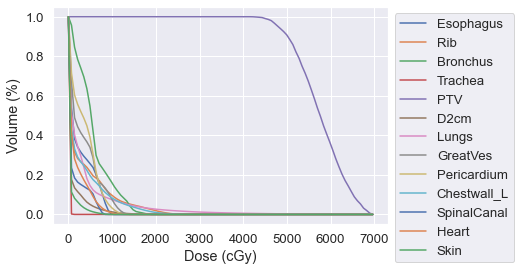

In [7]:
# Dose-volume histograms
result.dvhplot()

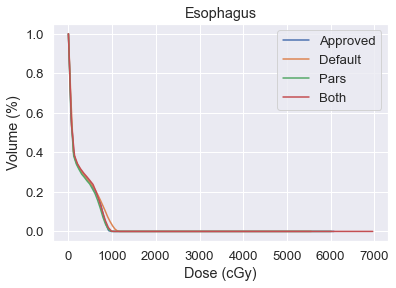

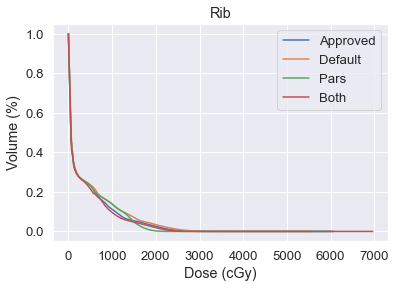

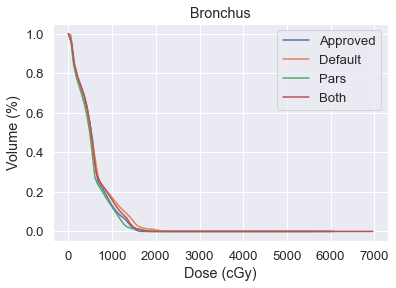

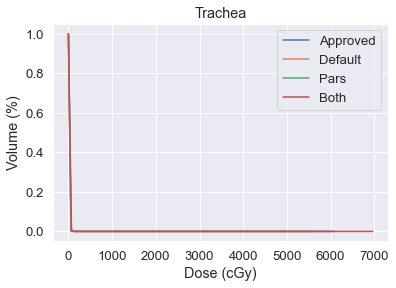

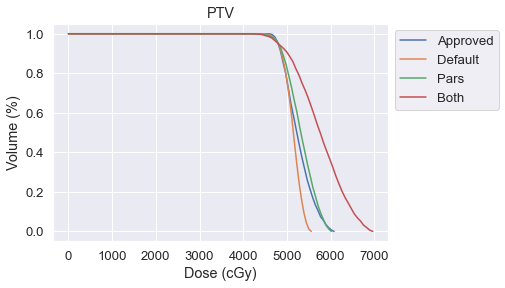

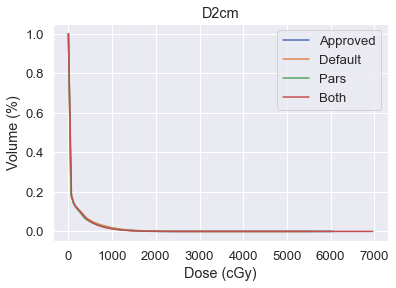

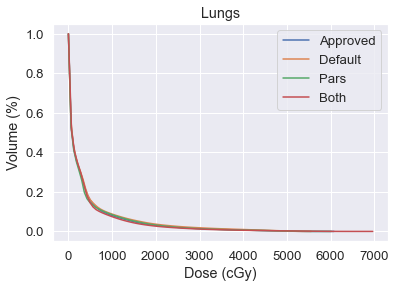

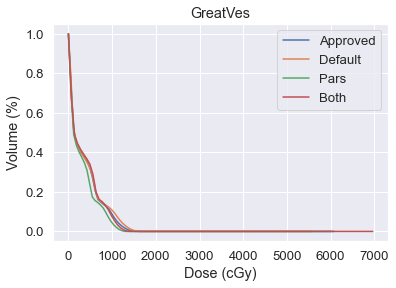

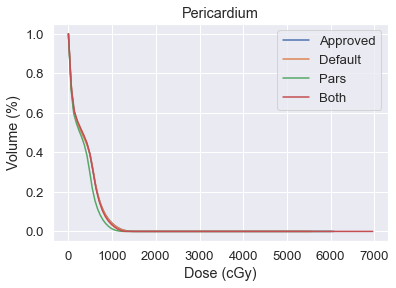

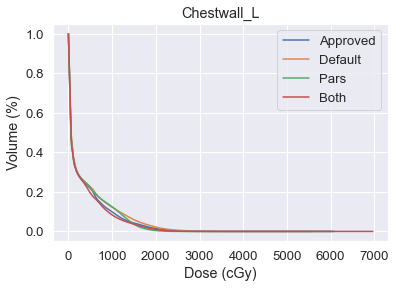

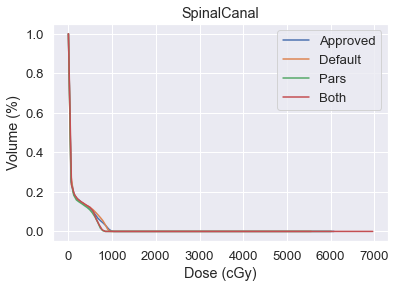

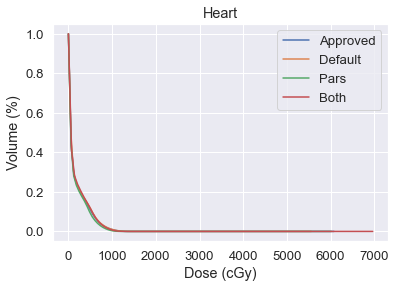

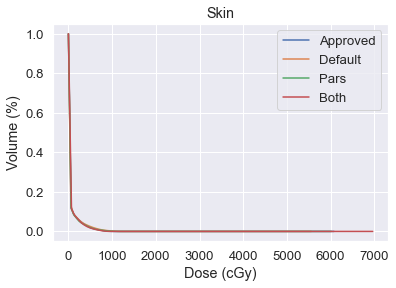

In [8]:
# Compare to approved and default plans
approved = np.load('../approved/result', allow_pickle=True)
default = np.load('../default/result', allow_pickle=True)
pars = np.load('../bayes_pars/result', allow_pickle=True)
for roi in result.roi_list:
    plt.figure()
    plt.plot(approved.dvh_dict['Dose'], approved.dvh_dict[roi])
    plt.plot(default.dvh_dict['Dose'], default.dvh_dict[roi])
    plt.plot(pars.dvh_dict['Dose'], pars.dvh_dict[roi])
    plt.plot(result.dvh_dict['Dose'], result.dvh_dict[roi])
    plt.xlabel('Dose (cGy)')
    plt.ylabel('Volume (%)')
    plt.title(roi)
    plt.legend(['Approved', 'Default', 'Pars', 'Both'], bbox_to_anchor=(1, 1))

In [10]:
# Compare DC2m MaxDose
index = approved.goal_df[approved.goal_df['Roi'] == 'D2cm'].index[0]
print(f"AcceptanceLevel: {approved.goal_df.iloc[index]['AcceptanceLevel']}, " +
      f"Approved: {approved.goal_dict[index][0]:.2f}, " +
      f"Default: {default.goal_dict[index][0]:.2f}, " +
      f"Pars: {pars.goal_dict[index][np.argmin(pars.opt_result.func_vals)]:.2f}, " +
      f"Both: {result.goal_dict[index][np.argmin(result.opt_result.func_vals)]:.2f}")

AcceptanceLevel: 2400, Approved: 2513.27, Default: 3082.28, Pars: 2738.48, Both: 2323.62


In [12]:
# Compare goal results
par_min = np.argmin(pars.opt_result.func_vals)
res_min = np.argmin(result.opt_result.func_vals)
for index, row in approved.goal_df.iterrows():
    level = row['AcceptanceLevel']
    app_val = approved.goal_dict[index][0]
    def_val = default.goal_dict[index][0]
    par_val = pars.goal_dict[index][par_min]
    res_val = result.goal_dict[index][res_min]
    print(f"Roi: {row['Roi']}, Approved: {100*(app_val - level)/level:.2f}, " +
          f"Default: {100*(def_val - level)/level:.2f}, " +
          f"Pars: {100*(par_val - level)/level:.2f}, " +
          f"Both: {100*(res_val - level)/level:.2f}")

Roi: Bronchus, Approved: -44.69, Default: -38.97, Pars: -47.53, Both: -40.77
Roi: Bronchus, Approved: -49.12, Default: -35.17, Pars: -45.99, Both: -45.16
Roi: Chestwall_L, Approved: -37.88, Default: -32.47, Pars: -45.14, Both: -41.34
Roi: D2cm, Approved: 4.72, Default: 28.43, Pars: 14.10, Both: -3.18
Roi: Esophagus, Approved: -63.35, Default: -62.48, Pars: -65.42, Both: -63.65
Roi: Esophagus, Approved: -67.97, Default: -60.64, Pars: -66.89, Both: -66.09
Roi: GreatVes, Approved: -74.63, Default: -72.61, Pars: -77.74, Both: -75.65
Roi: GreatVes, Approved: -66.06, Default: -65.80, Pars: -72.50, Both: -71.04
Roi: Heart, Approved: -68.24, Default: -67.95, Pars: -71.17, Both: -69.02
Roi: Heart, Approved: -57.57, Default: -55.44, Pars: -61.88, Both: -58.14
Roi: Lungs, Approved: -60.82, Default: -57.34, Pars: -59.10, Both: -64.16
Roi: Lungs, Approved: -75.56, Default: -74.81, Pars: -77.17, Both: -75.08
Roi: Pericardium, Approved: -62.60, Default: -62.71, Pars: -68.39, Both: -64.39
Roi: Pericar

In [13]:
# Met the D2cm goal, but did worse for the PTV MaxDose.

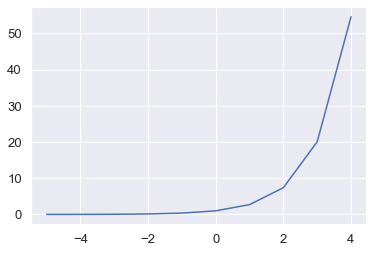

In [14]:
plt.plot(np.arange(-5, 5), np.exp(np.arange(-5, 5)))

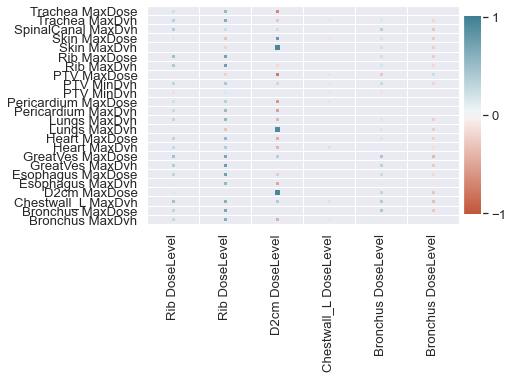

In [17]:
pars.corrplot('pars', size=10)

In [19]:
idx_d2 = pars.goal_df[pars.goal_df['Roi'] == 'D2cm'].index[0]

In [23]:
d2_vals = [row[idx_d2] for row in pars.opt_result.x_iters]

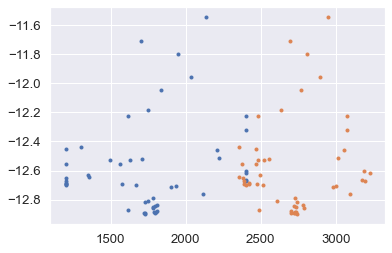

In [27]:
plt.plot(d2_vals, pars.opt_result.func_vals, '.')
plt.plot(pars.goal_dict[idx_d2], pars.opt_result.func_vals, '.')

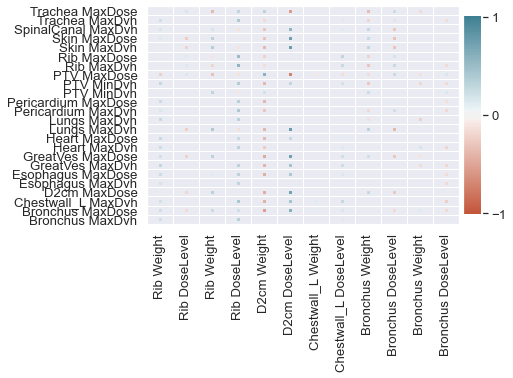

In [18]:
result.corrplot('pars', size=10)